In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import numpy as np
import os
import PIL
from PIL import Image

In [2]:
class mask_net(nn.Module):

    def __init__(self):
        super().__init__()
        self.model_ft = models.resnet18(pretrained=True)
        #for param in self.model_ft.features.parameters():
         #   param.requires_grad = False
        self.num_ftrs = self.model_ft.fc.in_features
        layers = list(self.model_ft.children())[:-1]
        self.feature_extractor = nn.Sequential(*layers)

        self.classifier = nn.Linear(self.num_ftrs, 5)

    def forward(self, x):
        self.feature_extractor.eval()
        with torch.no_grad():
            representations = self.feature_extractor(x).flatten(1)
        out = self.classifier(representations)

        return out


In [3]:
# Create the model
model = mask_net()

# Load state_dict
model.load_state_dict(torch.load('checkpoint.pth'))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

<All keys matched successfully>

In [4]:
img = PIL.Image.open('/work/Mask_No_Mask/dataset/design_mask/joby_1616487811.jpg')


In [5]:
def get_preprocessed_image(image_path):
    
    # transformations
    preprocess = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])
    #
    # Pass the image for preprocessing and the image preprocessed
    img = Image.open(image_path)
    img_preprocessed = preprocess(img)
    #
    
    batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)
    print('Batch image tensor', batch_img_tensor)
    return batch_img_tensor

In [6]:
model = mask_net()
  # Load state_dict
model.load_state_dict(torch.load('/work/checkpoint2.pth'))


def predict_class(model, batch_tensor):
  # Create the model
  
  model.eval()

  out = model(batch_tensor)
  print("Output value", out)
  class_idx = out[0].argmax().item()
  classes = {'design_mask': 0, 'design_mask_bad': 1, 'medical_mask': 2, 'medical_mask_bad': 3, 'no_mask': 4}
  
  for k,v in classes.items():
    if v == class_idx:
        return k

In [7]:
get_preprocessed_image('/work/Mask_No_Mask/test_data/Charles_1616423581.jpg')

Batch image tensor tensor([[[[ 0.8961,  0.9132,  0.8961,  ...,  1.9235,  1.9235,  1.9407],
          [ 0.9303,  0.9303,  0.9132,  ...,  1.9407,  1.9407,  1.9407],
          [ 0.9303,  0.9303,  0.9303,  ...,  1.8037,  1.6667,  1.4954],
          ...,
          [-0.7137, -0.7822, -0.9020,  ...,  0.3309,  0.3994,  0.4679],
          [-0.7308, -0.7650, -0.9192,  ...,  0.3652,  0.3994,  0.3994],
          [-0.7479, -0.7308, -0.9020,  ...,  0.3823,  0.4166,  0.3481]],

         [[ 0.8529,  0.8704,  0.8529,  ...,  2.0259,  2.0259,  2.0259],
          [ 0.8880,  0.8880,  0.8704,  ...,  2.0434,  2.0434,  2.0259],
          [ 0.8880,  0.8880,  0.8880,  ...,  1.8683,  1.7458,  1.5532],
          ...,
          [-0.3550, -0.4251, -0.6001,  ...,  0.9405,  1.0105,  1.0630],
          [-0.3725, -0.4076, -0.5826,  ...,  0.9755,  1.0105,  0.9930],
          [-0.4076, -0.3901, -0.5826,  ...,  0.9930,  1.0280,  0.9405]],

         [[ 0.7054,  0.7054,  0.6879,  ...,  2.0474,  2.0474,  2.0300],
          [

tensor([[[[ 0.8961,  0.9132,  0.8961,  ...,  1.9235,  1.9235,  1.9407],
          [ 0.9303,  0.9303,  0.9132,  ...,  1.9407,  1.9407,  1.9407],
          [ 0.9303,  0.9303,  0.9303,  ...,  1.8037,  1.6667,  1.4954],
          ...,
          [-0.7137, -0.7822, -0.9020,  ...,  0.3309,  0.3994,  0.4679],
          [-0.7308, -0.7650, -0.9192,  ...,  0.3652,  0.3994,  0.3994],
          [-0.7479, -0.7308, -0.9020,  ...,  0.3823,  0.4166,  0.3481]],

         [[ 0.8529,  0.8704,  0.8529,  ...,  2.0259,  2.0259,  2.0259],
          [ 0.8880,  0.8880,  0.8704,  ...,  2.0434,  2.0434,  2.0259],
          [ 0.8880,  0.8880,  0.8880,  ...,  1.8683,  1.7458,  1.5532],
          ...,
          [-0.3550, -0.4251, -0.6001,  ...,  0.9405,  1.0105,  1.0630],
          [-0.3725, -0.4076, -0.5826,  ...,  0.9755,  1.0105,  0.9930],
          [-0.4076, -0.3901, -0.5826,  ...,  0.9930,  1.0280,  0.9405]],

         [[ 0.7054,  0.7054,  0.6879,  ...,  2.0474,  2.0474,  2.0300],
          [ 0.7402,  0.7228,  

In [8]:
get_preprocessed_image('/work/Mask_No_Mask/test_data/Aderemi_1616416646.jpg')

Batch image tensor tensor([[[[1.3584, 1.2728, 1.2214,  ..., 1.9064, 1.9064, 1.8893],
          [1.3070, 1.2557, 1.2385,  ..., 1.8893, 1.8722, 1.9064],
          [1.2899, 1.2899, 1.2728,  ..., 1.8893, 1.8893, 1.8550],
          ...,
          [2.2147, 2.2147, 2.2147,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2147, 2.2147,  ..., 2.2489, 2.2489, 2.2489],
          [2.2318, 2.2318, 2.2318,  ..., 2.2489, 2.2489, 2.2489]],

         [[1.4482, 1.4132, 1.4132,  ..., 1.8859, 1.8859, 1.8683],
          [1.4482, 1.4307, 1.4307,  ..., 1.9209, 1.8859, 1.9209],
          [1.4307, 1.4307, 1.4482,  ..., 1.9209, 1.9209, 1.8859],
          ...,
          [2.1835, 2.2360, 2.2885,  ..., 2.4286, 2.4286, 2.4286],
          [2.1835, 2.1835, 2.2360,  ..., 2.4286, 2.4286, 2.4286],
          [2.0784, 2.1660, 2.2010,  ..., 2.4286, 2.4286, 2.4286]],

         [[1.6291, 1.5420, 1.5071,  ..., 1.7860, 1.6814, 1.6465],
          [1.6117, 1.5594, 1.5245,  ..., 1.8034, 1.7163, 1.7163],
          [1.5942, 1.59

tensor([[[[1.3584, 1.2728, 1.2214,  ..., 1.9064, 1.9064, 1.8893],
          [1.3070, 1.2557, 1.2385,  ..., 1.8893, 1.8722, 1.9064],
          [1.2899, 1.2899, 1.2728,  ..., 1.8893, 1.8893, 1.8550],
          ...,
          [2.2147, 2.2147, 2.2147,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2147, 2.2147,  ..., 2.2489, 2.2489, 2.2489],
          [2.2318, 2.2318, 2.2318,  ..., 2.2489, 2.2489, 2.2489]],

         [[1.4482, 1.4132, 1.4132,  ..., 1.8859, 1.8859, 1.8683],
          [1.4482, 1.4307, 1.4307,  ..., 1.9209, 1.8859, 1.9209],
          [1.4307, 1.4307, 1.4482,  ..., 1.9209, 1.9209, 1.8859],
          ...,
          [2.1835, 2.2360, 2.2885,  ..., 2.4286, 2.4286, 2.4286],
          [2.1835, 2.1835, 2.2360,  ..., 2.4286, 2.4286, 2.4286],
          [2.0784, 2.1660, 2.2010,  ..., 2.4286, 2.4286, 2.4286]],

         [[1.6291, 1.5420, 1.5071,  ..., 1.7860, 1.6814, 1.6465],
          [1.6117, 1.5594, 1.5245,  ..., 1.8034, 1.7163, 1.7163],
          [1.5942, 1.5942, 1.5768,  ..., 1

In [9]:
PRED_DICT = {'design_mask': 0, 'design_mask_bad': 0, 'medical_mask': 0, 'medical_mask_bad': 0, 'no_mask': 0}

In [22]:
def update_predictions(dir_path):

  file_paths = os.listdir(dir_path)
  base_dir = '/work/Mask_No_Mask/results/Crops/'#'/work/Mask_No_Mask/test_data/'
  for f in file_paths:
    print("file", f)
    preprocessed_img = get_preprocessed_image(base_dir+f) #
    predicted_class = predict_class(model, preprocessed_img)
    PRED_DICT[predicted_class] += 1 
  return PRED_DICT

In [11]:
img_path = '/work/Mask_No_Mask/dataset/design_mask/joby_1616487811.jpg'

In [12]:
im = get_preprocessed_image(img_path)

Batch image tensor tensor([[[[ 0.3994,  0.3994,  0.3994,  ...,  0.1768,  0.1597,  0.2111],
          [ 0.4337,  0.3823,  0.3823,  ...,  0.1939,  0.1939,  0.2111],
          [ 0.4851,  0.4337,  0.3652,  ...,  0.2111,  0.2453,  0.2111],
          ...,
          [-0.1143, -0.1486, -0.1999,  ..., -1.9467, -1.9638, -1.9809],
          [-0.1314, -0.1486, -0.2171,  ..., -1.9295, -1.9638, -1.9809],
          [-0.1143, -0.1486, -0.2171,  ..., -1.9295, -1.9467, -1.9467]],

         [[ 0.2577,  0.2577,  0.2927,  ...,  0.1877,  0.1702,  0.2052],
          [ 0.3277,  0.2402,  0.2752,  ...,  0.2227,  0.2052,  0.2052],
          [ 0.3627,  0.3102,  0.2577,  ...,  0.2577,  0.2752,  0.2227],
          ...,
          [-0.1450, -0.1625, -0.1800,  ..., -1.8081, -1.8256, -1.8081],
          [-0.1800, -0.1800, -0.2500,  ..., -1.8081, -1.8081, -1.8081],
          [-0.1800, -0.1975, -0.2675,  ..., -1.8256, -1.8431, -1.8081]],

         [[ 0.6182,  0.6531,  0.6705,  ...,  0.6531,  0.6531,  0.6879],
          [

In [13]:
predict_class(model, im)

Output value tensor([[ 0.1102, -1.6619,  1.6072,  0.5405, -1.1683]],
       grad_fn=<AddmmBackward>)


'medical_mask'

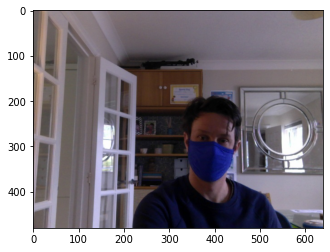

In [14]:
plt.imshow(plt.imread(img_path))

In [15]:
def sort_class_counter(pred_class):

    return sorted(pred_class.items(), key=lambda x: x[1], reverse=True)
    

In [16]:
def sort_class_counter(pred_class):

    return sorted(pred_class.items(), key=lambda x: x[1], reverse=True)
    

def plot_barchart():

    sorted_classes = sort_class_counter(PRED_DICT)

    plt.bar(range(len(sorted_classes)), sorted_classes.values(), align='center')
    plt.xticks(range(len(sorted_classes)), list(sorted_classes.keys()))

    plt.show()

In [23]:
some_preds = update_predictions('/work/Mask_No_Mask/results/Crops')

file Person0.png
Batch image tensor tensor([[[[-0.8678, -0.7479, -0.6794,  ...,  0.3309,  0.0398, -0.0458],
          [-0.8849, -0.7822, -0.7137,  ...,  0.7248,  0.6906,  0.6049],
          [-0.8849, -0.7993, -0.7308,  ...,  0.8789,  0.9474,  0.8618],
          ...,
          [ 2.0777,  2.0777,  2.0777,  ..., -1.0048, -1.0048, -1.0048],
          [ 2.0948,  2.0777,  2.0777,  ..., -1.0048, -1.0048, -1.0048],
          [ 2.0948,  2.0777,  2.0777,  ..., -1.0048, -1.0219, -1.0219]],

         [[-0.7402, -0.6176, -0.5476,  ...,  0.4328,  0.1527,  0.0826],
          [-0.7577, -0.6527, -0.5826,  ...,  0.8179,  0.8004,  0.7304],
          [-0.7577, -0.6702, -0.6001,  ...,  0.9405,  1.0105,  0.9755],
          ...,
          [ 2.1660,  2.1660,  2.1660,  ..., -0.9328, -0.9328, -0.9328],
          [ 2.1835,  2.1660,  2.1660,  ..., -0.9328, -0.9328, -0.9328],
          [ 2.1835,  2.1660,  2.1660,  ..., -0.9153, -0.9153, -0.9153]],

         [[-0.4624, -0.3404, -0.2707,  ...,  0.6705,  0.3916,  0.3

In [24]:
PRED_DICT

{'design_mask': 7,
 'design_mask_bad': 4,
 'medical_mask': 5,
 'medical_mask_bad': 0,
 'no_mask': 2}

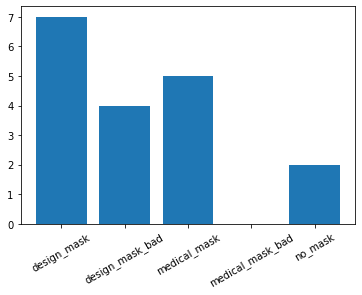

In [25]:
plt.bar(range(len(PRED_DICT)), list(PRED_DICT.values()), align='center')
plt.xticks(range(len(PRED_DICT)), list(PRED_DICT.keys()), rotation=30)


plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9f1e7bdb-154a-4549-a646-7775bf1dc7a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>